In [1]:
import adaptive
import time
import numpy as np
from dask_quantumtinkerer import Cluster, cluster_options

In [2]:
options = cluster_options()
options.worker_cores = 2
options.worker_memory = 2
options.extra_path = "/home/jtorresluna/trijunction-design/"

In [3]:
# this fails
cluster= Cluster(options, asynchronous=True)
client = cluster.get_client()

TypeError: Scheduler address must be a string or a Cluster instance, got <class 'dask_quantumtinkerer.client.Cluster'>

In [1]:
# this doesn't fail
from dask.distributed import Client
client = Client(asynchronous=True)

2022-09-28 10:30:53,198 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-1s_zmwa0', purging
2022-09-28 10:30:53,199 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-tk83fns6', purging
2022-09-28 10:30:53,199 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-ri6o908z', purging
2022-09-28 10:30:53,200 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-matc_fwa', purging


In [3]:
print("http://io.quantumtinkerer.tudelft.nl/user/jdtorres/proxy/"+client.cluster.dashboard_link[17:])

http://io.quantumtinkerer.tudelft.nl/user/jdtorres/proxy/8787/status


In [4]:
def f(x):
    time.sleep(np.random.randint(5))
    return np.exp(-x / 5) * np.sin(x)


async def fff(x):
    return await client.submit(f, x)


async def ff(x):
    future = client.submit(f,x)
    result = await client.gather(future, asynchronous=True)
    return result

In [5]:
learner = adaptive.Learner1D(
    fff,
    bounds=(-10, 10)
)

runner = adaptive.AsyncRunner(
    learner,
    goal=lambda l: l.loss() < 0.001,
    ntasks=20
)

In [264]:
runner.cancel()

In [250]:
x = learner.data.keys()
y = learner.data.values()

In [260]:
runner.task.result()

InvalidStateError: Result is not set.

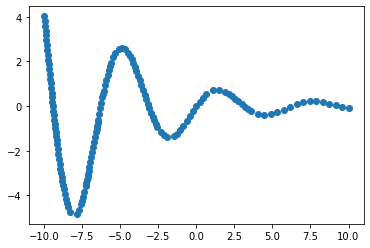

In [221]:
plt.scatter(x, y)

In [196]:
future = client.submit(f, 3)

In [78]:
future

<Future: finished, type: int, key: f-061a5080e1ba123f06fb51656bf95e54>

In [240]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 8
Total threads: 48,Total memory: 20.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:38941,Workers: 8
Dashboard: http://127.0.0.1:8787/status,Total threads: 48
Started: Just now,Total memory: 20.00 GiB
Comm: tcp://127.0.0.1:40252,Total threads: 6
Dashboard: http://127.0.0.1:40578/status,Memory: 2.50 GiB
Nanny: tcp://127.0.0.1:35046,
